### K 평균 군집분석(K-means Clustering)

- k개의 집단으로 데이터를 분류하는 알고리즘
- 찾아야 하는 결과값을 몰라도 적용할 수 있는 방법(비지도 학습 : Unsupervised Learning)
- 파라미터로 전달 받은 군집의 수 k에 따라 각각의 군집의 중심점을 기준으로 분류 입니다.
- 각 군집에 속하는 데이터들 간의 응집도를 최대로(거리를 최소화하는) k개의 군집으로 분할
    - 분할하고자 하는 k개의 군집 개수를 파라미터로 전달
    - 각 군집별 중심과 군집 내 데이터 간의 거리 제곱합을 최소로 하는 군집을 찾는 것이 알고리즘의 주 목표
    - 임의로 선택한 k개의 중심점을 기준으로 분할 한 후 각각의 데이터에 대해 가장 가까운 중심에 연결지어 분할하고 이 작업을 반복
    - 소속 군집이 변경되지 않거나 중심점이 변하지 않는 상태가 되면 반복을 중지하여 종료
    - 초기값(입력한 k값)에 따라 클러스터링 결과가 극명하게 달라짐
    - 구형 분포를 가진 데이터에 대해서 군집을 생성하여 분할하는데 적합
- 입력 변수에 대한 정규화 필요
    - 값의 단위가 다를 경우 값이 큰 특정 변수에 의해 결과값이 치우칠 수 있음
    - 입력변수를 스케일링, 정규화 하는 작업 필요
- 인덱스 형식의 군집 레이블이 생성되며 학습이 반복될 때 마다 임의로 변경될 수 있음
- 군집의 개수를 입력해야 하고 중심점의 초기값을 임의로 지정한다는 점에서 오분류 가능성이 높은 취약점

In [1]:
# pandas, matplotlib, saeborn 라이브러리 불러오기
# sklearn : 데이터 셋, KMeans 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets # 샘플 데이터셋 제공
from sklearn.cluster import KMeans # KMeans Clustering 알고리즘 제공

In [2]:
# iris 데이터셋 적재
iris = datasets.load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# 종속변수(라벨) 추출
labels = pd.DataFrame(iris.target)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
# 입력변수(데이터, 문제) 추출
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 입력변수(문제), 종속변수(답) 데이터 결합
data = pd.concat([data, labels], axis=1) # hstack도 가능
data.head()

,sepal length,sepal width,petal length,petal width,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'labels']
data.head()

,sepal length,sepal width,petal length,petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# 붓꽃 데이터에서 2개의 데이터만 추출
# sepal length, sepal width
# KMeans : 비지도학습이기 때문에 종속변수(정답) 없이 독립변수(문제)만 시용
sample1 = data[['sepal length', 'sepal width']]
sample1.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [10]:
# KMeans 모델 생성
# 사용자가 조작해서 입력하는 값 : 입력변수, k값(초기값)
# 초기값 : 3개
# KMeans 객체 생성 시 n_clusters 파라미터 값으로 k값 전달
kmeans3 = KMeans(n_clusters=3)

In [11]:
# 모델 학습
# model.fit(input_data)
# 지도학습 => model.fit(x(문제), y(답))
kmeans3.fit(sample1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# 학습결과 (예측한 군집 번호) 반환받기
# fit 실행 후 -> predict
label_cluster = kmeans3.predict(sample1)
label_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [13]:
iris.target # 실제 정답 : setosa는 분류 잘함

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 아래 단계(라벨 인코딩 - 정확도)까지는 KMeans Clustering에서 유효하지 않은 결과

In [14]:
# 예측데이터 얻어오기
cluster_pred = pd.Series(label_cluster)
cluster_pred

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    0
147    1
148    1
149    0
Length: 150, dtype: int32

In [15]:
# 예측값
cluster = cluster_pred.values

In [16]:
# 실제 라벨
label = data['labels'].values

In [17]:
# 정확도 얻기(비지도 학습) -> 지도학습은 .score()를 활용
from sklearn import metrics

metrics.adjusted_rand_score(cluster, label)

0.6006861021484542

In [18]:
# 입력변수 데이터와 KMeans 결과 데이터 합치기
pred = pd.DataFrame(kmeans3.predict(sample1))
pred

,0
0,2
1,2
2,2
3,2
4,2
...,...
145,1
146,0
147,1
148,1


In [19]:
pred.columns = ['predict']

In [20]:
sample1.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:
# 문제로 사용한 sample1과 추론한 결과만 pred를 concat으로 붙여준다.
result = pd.concat([sample1, pred], axis=1)
result

,sepal length,sepal width,predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


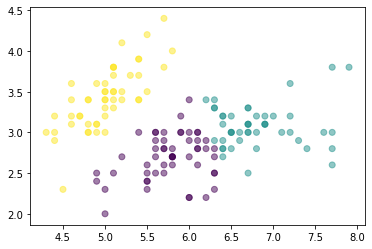

In [22]:
# (연습문제) 결과물에 대한 산점도를 시각화
# plt.scatter()
# x축 = sepal length 컬럼
# y축 = sepal width 컬럼
# 색상 = predict 컬럼
# 투명도 : alpha=0.5

plt.scatter(result['sepal length'], result['sepal width'],c=result['predict'], alpha=0.5)

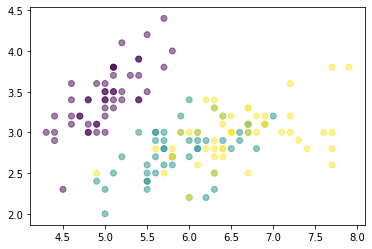

In [23]:
# 색상을 data['labels']로 고쳐서 산점도를 다시 그려주세요
plt.scatter(result['sepal length'], result['sepal width'],c=data['labels'], alpha=0.5)

In [24]:
# 군집 중심점 시각화
# model.cluster_centers_
points = kmeans3.cluster_centers_
points

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [25]:
# 중심점 위치를 데이터프레임화
centers = pd.DataFrame(points, columns = ['sepal length', 'sepal width'])
centers

,sepal length,sepal width
0,5.773585,2.692453
1,6.812766,3.074468
2,5.006000,3.428000


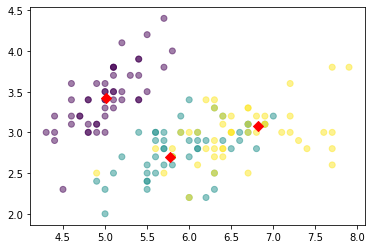

In [26]:
# 군집 자체의 시각화
plt.scatter(result['sepal length'], result['sepal width'],c=data['labels'], alpha=0.5)
# 군집 중심점 시각화
plt.scatter(centers['sepal length'], centers['sepal width'],c='r', marker='D', s=50)

### petal

In [29]:
## 붓꽃 데이터에서 2개의 데이터만 추출
# petal length, petal width
# KMeans : 비지도학습이기 때문에 종속변수(정답) 없이 독립변수(문제)만 시용
sample2 = data[['petal length', 'petal width']]
sample2.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [64]:
# KMeans 모델 생성
# 사용자가 조작해서 입력하는 값 : 입력변수, k값(초기값)
# 초기값 : 3개
# KMeans 객체 생성 시 n_clusters 파라미터 값으로 k값 전달
kmeans3_p = KMeans(n_clusters=3)

In [65]:
# 모델 학습
# model.fit(input_data)
# 지도학습 => model.fit(x(문제), y(답))
kmeans3_p.fit(sample2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
# 학습 결과(예측한 군집 번호) 반환받기
# fit 실행 후 -> predict
label_cluster_p = kmeans3_p.predict(sample2)
label_cluster_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 아래 단계(라벨 인코딩 ~ 정확도)까지는 KMeans Clustering 에서 유효하지 않은 결과

In [68]:
# 예측데이터 얻어오기
cluster_pred_p = pd.Series(label_cluster_p)
cluster_pred_p

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [69]:
# 예측값
cluster_p = cluster_pred_p.values

In [70]:
# 실제 라벨
label_p = data['labels'].values

In [71]:
metrics.adjusted_rand_score(cluster_p, label_p)

0.8856970310281228

In [73]:
# 입력변수 데이터와 KMeans 결과 데이터 합치기
pred_p = pd.DataFrame(kmeans3_p.predict(sample2))
pred_p

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [74]:
pred_p.columns = ['predict']
pred_p

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [75]:
sample2.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [76]:
# 문제로 사용한 sample2과 추론한 결과만 pred_p를 concat으로 붙여준다.
result_p = pd.concat([sample2, pred_p], axis=1)
result_p

,petal length,petal width,predict
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


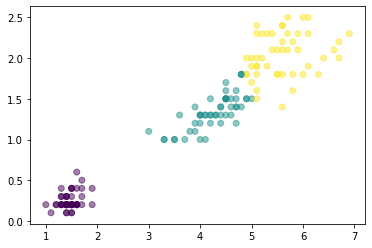

In [77]:
# (연습문제) 결과물에 대한 산점도를 시각화
# plt.scatter()
# x축 = petal length 컬럼
# y축 = petal width 컬럼
# 색상 = predict 컬럼
# 투명도 : alpha=0.5

plt.scatter(result_p['petal length'], result_p['petal width'],c=result_p['predict'], alpha=0.5)

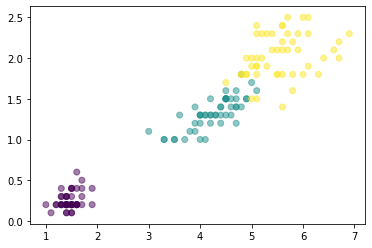

In [78]:
# 색상을 data['labels']로 고쳐서 산점도를 다시 그려주세요
plt.scatter(result_p['petal length'], result_p['petal width'],c=data['labels'], alpha=0.5)

In [81]:
# 군집 중심점 시각화
# model.cluster_centers_
points_p = kmeans3.cluster_centers_
points_p

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [82]:
# 중심점 위치를 데이터프레임화
centers_p = pd.DataFrame(points_p, columns = ['petal length', 'petal width'])
centers_p

,petal length,petal width
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


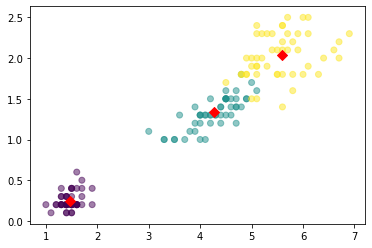

In [83]:
# 군집 자체의 시각화
plt.scatter(result_p['petal length'], result_p['petal width'], 
            c=data['labels'], alpha=0.5)
# 군집 중심점 시각화
plt.scatter(centers_p['petal length'], centers_p['petal width'], c='r', marker='D', s=50)